# Optimizing delivery with Reinforcement Learning


In [6]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook
import sys
sys.path.append("../")
from delivery import *
from delivery import run_episode, run_n_episodes, DeliveryQAgent
from Env import DeliveryEnvironment
from qagent import QAgent

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Environment definition
As for any RL problem, an environment must be designed where the Agent will evolve.<br>
For convenience and readability, we will define it like OpenAI Gym environments

Initialized Delivery Environment with 10 random stops
Target metric for optimization is distance


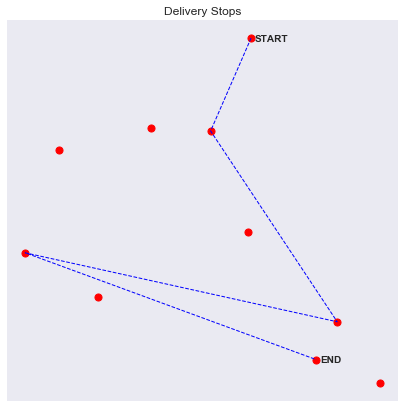

In [7]:
env = DeliveryEnvironment(n_stops = 10)

for i in [0,1,2,3]:
    env.step(i)
env.render()

# Q Learning
## Simple case

Initialized Delivery Environment with 50 random stops
Target metric for optimization is distance


episod: 0
episod: 100
episod: 200
episod: 300
episod: 400
episod: 500
episod: 600
episod: 700
episod: 800
episod: 900



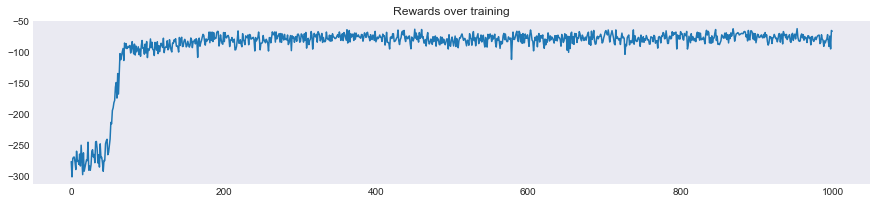

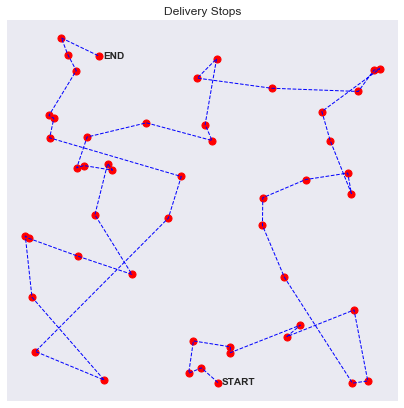

done


In [26]:
env = DeliveryEnvironment(n_stops = 50, method = "distance")
# alpha = 0.8  gamma = 0.8 max 
# alpha = 0.3 gamma = 0.8 sars
# alpha = 0.4 gamme = 0.5 soft
agent = QAgent(nA=env.action_space, nS=env.observation_space, alpha=0.3, gamma=0.8, eps_start=1, eps_decay=0.95, eps_min=0.01, sars='sars')



run_n_episodes(env,agent,"training_50_stops1.gif", n_episodes=1000)
env.render()
print('done')

## Traffic case

Initialized Delivery Environment with 100 random stops
Target metric for optimization is traffic_box


episod: 0
episod: 100
episod: 200
episod: 300
episod: 400
episod: 500
episod: 600
episod: 700
episod: 800
episod: 900


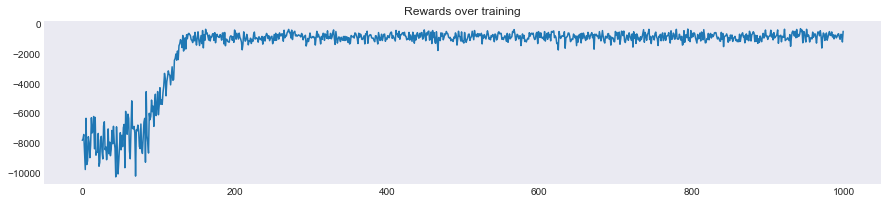

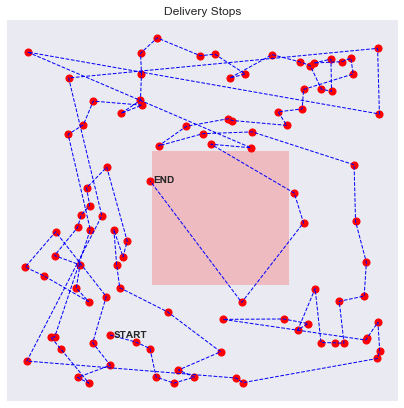

done


In [109]:
env = DeliveryEnvironment(n_stops = 100,method = "traffic_box",box_size = 0.6,traffic_intensity = 100)
# agent = QAgent(nA=env.action_space, nS=env.observation_space)
agent = QAgent(nA=env.action_space, nS=env.observation_space, alpha=0.45, gamma=0.22, sars='soft')


run_n_episodes(env,agent,"training_100_stops_traffic1.gif")
env.render()

print('done')

Initialized Delivery Environment with 50 random stops
Target metric for optimization is time_window


episod: 0
episod: 100
episod: 200
episod: 300
episod: 400
episod: 500
episod: 600
episod: 700
episod: 800
episod: 900


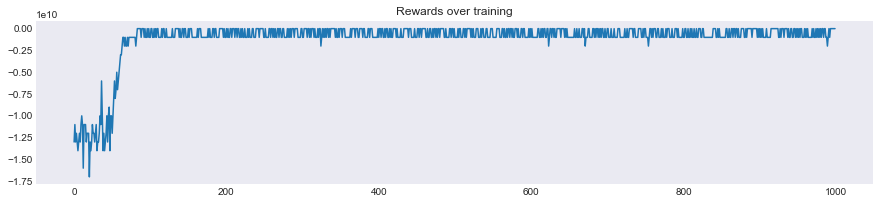

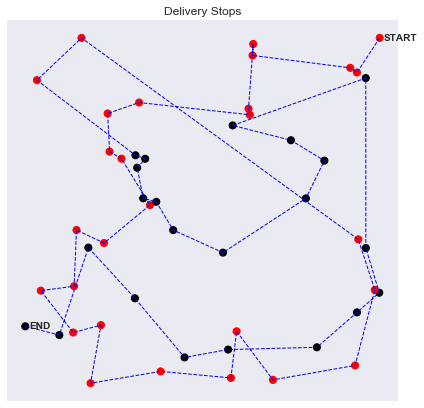

done


In [105]:
env = DeliveryEnvironment(n_stops = 500,method = "time_window")
agent = QAgent(nA=env.action_space, nS=env.observation_space, alpha=0.4, gamma=0.22, sars='soft')
run_n_episodes(env,agent,"training_100_stops_traffic.gif")
env.render()
print('done')